## Model training

Here we are going to train the data with all the columns

In [1]:
#import the libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading the data with the columns ready to train the model
data_frame=pd.read_csv('final_data_all.csv')

In [3]:
data_frame.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,0.205903,2.150579,-1.173869,-0.335437,-0.658598,0.921634,-1.317809,-0.277805,0.393668,0.703071,0.148453,-0.21666,0.128926,0.291569,<=50K
1,0.895359,1.463736,-1.088463,-0.335437,-0.658598,-0.406212,-0.608387,-0.900181,0.393668,0.703071,-0.145920,-0.21666,-2.611727,0.291569,<=50K
2,0.133824,0.090050,0.380227,0.181332,1.215082,-1.734058,-0.135438,-0.277805,0.393668,0.703071,-0.145920,-0.21666,0.128926,0.291569,<=50K
3,1.057050,0.090050,0.548231,-2.402511,0.874413,-0.406212,-0.135438,-0.900181,-1.962621,0.703071,-0.145920,-0.21666,0.128926,0.291569,<=50K
4,-0.713580,0.090050,1.360957,-0.335437,-0.658598,-0.406212,0.810458,2.211698,-1.962621,-1.422331,-0.145920,-0.21666,0.128926,-4.054223,<=50K


In [4]:
#assigning the data as input and output 
x=data_frame.drop(['salary'],axis=1)
y=data_frame[['salary']]

In [5]:
#spliting the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,train_size=0.7,random_state=46)

In [6]:
#initializing the models

1. Logistic Regression

In [7]:
log_model=LogisticRegression()
log_model.fit(x_train,y_train)
log_model.score(x_test,y_test)

0.8071450506704883

2. Decision Tree Classifier

In [8]:
tree_model=DecisionTreeClassifier()
tree_model.fit(x_train,y_train)
tree_model.score(x_test,y_test)

0.8147200327566793

3. Hist Gradient Boosting Classifier

In [9]:
hist_model=HistGradientBoostingClassifier()
hist_model.fit(x_train,y_train)
hist_model.score(x_test,y_test)

0.8732725969904801

In [10]:
predicted_values=hist_model.predict(x_test)

In [11]:
predicted_values

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

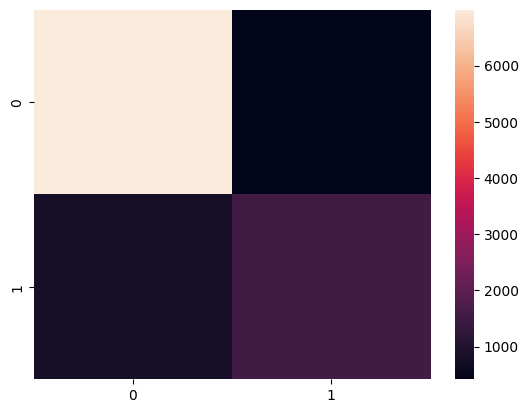

array([[6994,  417],
       [ 821, 1537]])

In [12]:
sns.heatmap(confusion_matrix(y_test,predicted_values))
plt.show()
confusion_matrix(y_test,predicted_values)

- hist gradient boosting classifier works well with 87% of accuracy 

In [13]:
import pickle
with open('hist_grad_bc.pkl','wb') as pickle_file:
    pickle.dump(hist_model,pickle_file)

In [3]:
print('Welcome to Adult Census Income Prediction')
print('----------------------------------------------------------')
print('Importing Libraries...')
import pickle
import pandas as pd
import numpy as np
import json
import random
import warnings
warnings.filterwarnings('ignore')
print('Loading model...')
all_set=False
columns=[]
i_inputs={}
final_inputs=[]
if 1>0:
    #loading the csv files
    i_data=pd.read_csv('data/i_data.csv')
    i_data['education-num']=i_data['education-num'].astype(str)
    final_data=pd.read_csv('data/final_data_all.csv')
    with open('data/encoded_values.json','rb') as file:
        encoded_values=json.load(file)
    columns=list(final_data.columns)
    obj_cols=i_data.select_dtypes(include='object').columns
    num_cols=i_data.select_dtypes(include='number').columns
    with open('data/hist_grad_bc.pkl','rb') as file_name:
        model=pickle.load(file_name)
    with open('data/ss_scale_values.pkl','rb') as file_name:
        ss_scale_model=pickle.load(file_name)
    print('Required files loaded successfully:)')
    all_set=True
else:
    print('Model not loaded.')
def work():
    print('Please enter the input values in json format to predict the output')
    print('------------------------')
    i=1
    for col in columns:
        if col=='salary':
            continue
        if col in obj_cols:
            uni_values=list(encoded_values[col].keys())
            print('------------------------------------')
            while True:
                print('Column: ('+str(i)+'/'+str(len(columns)-1)+')'+'Enter the input for '+col+'(Must be one from the following list of values) or Press enter to select the random value:')
                print(uni_values)
                inp_val=input('Here: ')
                print('------------------------------------')
                if len(inp_val)==0:
                    inp_val=random.choice(uni_values)
                    print(inp_val)
                if inp_val in uni_values:
                    encoded_value=encoded_values[col][inp_val]
                    final_inputs.append(encoded_value)
                    break
                else:
                    print("Incorrect input")
            i=i+1
        if col in num_cols:
            print('------------------------------------')
            while True:
                print('Column: ('+str(i)+'/'+str(len(columns)-1)+')'+'Enter the input for '+col+'(Number) or Press enter to select the random value: ')
                inp_val=input('Here: ')
                print('------------------------------------')
                if len(inp_val)==0:
                    inp_val=random.randrange(0,max(i_data[col]))
                    print(inp_val)
                try:
                    inp_val=int(inp_val)
                    if col=='fnlwgt':                    
                        final_inputs.append(np.sqrt(inp_val))
                        break
                    else:
                        final_inputs.append(np.log(inp_val))
                        break
                except:
                    print('Please enter number, not text character(s)')
            i=i+1
    output=model.predict(ss_scale_model.transform([final_inputs]))[0].strip()
    print('------------------------------------')
    
    
    
    
    
    print('Predicted value: ',output)
    print('-------------------------------------------------------------------------------------')
if all_set==True:
    print('All set to work...')
    print('------------------------------------------------------------------')
    print('------------------------------------------------------------------')
    while True:
        p_or_not=input('Predict the values: [Y/n]?')
        if p_or_not.lower()=='y':
            work()
        if p_or_not.lower()=='n':
            print('Thanks for using...')
            break

Welcome to Adult Census Income Prediction
----------------------------------------------------------
Importing Libraries...
Loading model...
Required files loaded successfully:)
All set to work...
------------------------------------------------------------------
------------------------------------------------------------------
Predict the values: [Y/n]?y
Please enter the input values in json format to predict the output
------------------------
------------------------------------
Column: (1/14)Enter the input for age(Number) or Press enter to select the random value: 
Here: 
------------------------------------
87
------------------------------------
Column: (2/14)Enter the input for workclass(Must be one from the following list of values) or Press enter to select the random value:
['?', 'Federal-gov', 'Local-gov', 'Never-worked', 'Private', 'Self-emp-inc', 'Self-emp-not-inc', 'State-gov', 'Without-pay']
Here: 
------------------------------------
Without-pay
-----------------------